# Análise de Regressão Linear Múltipla com Sklearn

In [6]:
import numpy as np
import pandas as pd
# transform
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
# model
from sklearn.linear_model import LinearRegression
# metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
# graphics
import matplotlib.pyplot as plt
import seaborn as sns
# view all data frames collums
pd.set_option('display.max_columns', None)

### Carregando os Dados

In [2]:
complete_data_with_totalnet = pd.read_csv("data/integrated_processed_enem_anatel_ibge_2019.csv", encoding="latin_1")
complete_data_with_totalnet["densidade_total_internet_fixa"] = complete_data_with_totalnet[['fibra_optica', 'wifi', 'ethernet', 'lte',
                                                        'vsatelite', 'wimax', 'plc_eletrico', 'xdsl', 
                                                        'cable_modem', 'fwa_5g_fixed', 'atm_backbone',
                                                        'dth_satelite', 'hfc_tv_cabo', 'fr_frame_relay',
                                                        'mmds']].sum(axis=1)
complete_data_with_totalnet.sort_values(by="cod_municipio_ibge", inplace= True)
complete_data_with_totalnet = complete_data_with_totalnet[['cod_municipio_ibge', 'NO_MUNICIPIO_RESIDENCIA',
                                                          'UF', 'fibra_optica', 'wifi', 'ethernet', 'lte',
                                                          'vsatelite', 'wimax', 'plc_eletrico', 'xdsl', 
                                                          'cable_modem', 'fwa_5g_fixed', 'atm_backbone',
                                                          'dth_satelite', 'hfc_tv_cabo', 'fr_frame_relay',
                                                          'mmds', 'densidade_total_internet_fixa', 
                                                          'remuneracao_media', 'gini', 'pib', 
                                                          'pib_p_capta', 'media_idhm', 
                                                          'mean_grades_group_cities']]
complete_data_with_totalnet

,cod_municipio_ibge,NO_MUNICIPIO_RESIDENCIA,UF,fibra_optica,wifi,ethernet,lte,vsatelite,wimax,plc_eletrico,xdsl,cable_modem,fwa_5g_fixed,atm_backbone,dth_satelite,hfc_tv_cabo,fr_frame_relay,mmds,densidade_total_internet_fixa,remuneracao_media,gini,pib,pib_p_capta,media_idhm,mean_grades_group_cities
3852,1100015,Alta Floresta D'Oeste,RO,0,0,3,0,0,0,0,239,0,0,0,0,0,2,0,244,2030.28,0.472,4.956288e+08,21600.73,0.644038,493.009774
3853,1100023,Ariquemes,RO,0,0,47,0,0,0,0,0,0,8,0,0,0,3,0,58,2030.28,0.472,2.578830e+09,23908.38,0.644038,491.642412
3854,1100031,Cabixi,RO,3,129,2,0,3,0,0,75,0,0,0,0,0,0,0,212,2030.28,0.472,1.399594e+08,26347.78,0.644038,479.756641
3855,1100049,Cacoal,RO,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,6,2030.28,0.472,2.260644e+09,26483.95,0.644038,497.176007
3856,1100056,Cerejeiras,RO,0,0,0,0,0,0,0,644,0,0,0,0,0,4,0,648,2030.28,0.472,5.068545e+08,31051.55,0.644038,493.380822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,5222005,Vianópolis,GO,0,0,0,0,74,0,0,606,0,0,0,0,0,0,0,680,2019.95,0.460,4.836633e+08,34888.79,0.694984,500.626357
1125,5222054,Vicentinópolis,GO,0,0,0,0,0,0,0,120,0,0,0,0,0,2,0,122,2019.95,0.460,3.423556e+08,39157.68,0.694984,477.479032
1126,5222203,Vila Boa,GO,83,142,0,0,0,0,0,0,0,0,0,0,0,1,0,226,2019.95,0.460,1.136685e+08,18419.78,0.694984,456.444022
1127,5222302,Vila Propício,GO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019.95,0.460,2.069712e+08,35555.96,0.694984,468.682727


### Preparando o dataset para o procedimento de Regressão com a biblioteca Sklearn

#### Separando as variáveis numéricas em indepentes e dependentes considerando as densidades totais do acesso a internet

In [4]:
num_data_independent = complete_data_with_totalnet[['densidade_total_internet_fixa', 
                                                          'remuneracao_media', 'gini', 'pib', 
                                                          'pib_p_capta', 'media_idhm']]
num_data_label = complete_data_with_totalnet['mean_grades_group_cities']

#### Dividindo as n observações em 70% para treino e 30% para teste

In [88]:
x_train, x_test, y_train, y_test = train_test_split(num_data_independent, num_data_label, 
                                                    train_size= 0.75, random_state=42)

### Avaliação dos testes estatísticos T e F para o modelo

#### Treinando o modelo

In [18]:
model_ols = LinearRegression()
model_ols.fit(x_train, y_train)

LinearRegression()

#### Predição do teste, y_hat

In [19]:
y_predicted = model_ols.predict(x_test)

#### Score R² - OLS

In [16]:
model_ols.score(x_test, y_test)

0.4963982456882995

#### Score RMSE - Raiz Quadrada do Erro Médio Quadrado

In [51]:
round(np.sqrt(mean_squared_error(y_true= y_test, y_pred= y_predicted)), 2)

17.68

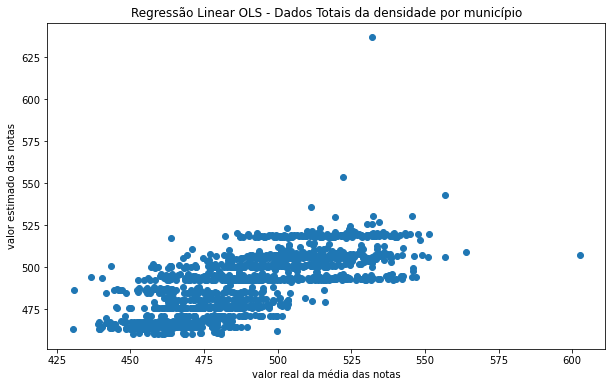

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(x= y_test, y= y_predicted)
plt.title("Regressão Linear OLS - Dados Totais da densidade por município")
plt.xlabel("valor real da média das notas")
plt.ylabel("valor estimado das notas")
plt.show()

#### Coeficientes Betas da Regressão por municípios e o Intercepto

In [41]:
print(f" A equação do modelo OLS sem transformações para os dados de entrada:\n") 
print(f" mean_grades_mun= {round(model_ols.intercept_,3)} + {round(model_ols.coef_[0],3)}*internet + {round(model_ols.coef_[1],3)}*remuneracao + {round(model_ols.coef_[2],3)}*gini + {round(model_ols.coef_[3], 2)}*pib + {round(model_ols.coef_[4], 2)}*pib_capta + {round(model_ols.coef_[5], 2)}*idh")                               

 A equação do modelo OLS sem transformações para os dados de entrada:

 mean_grades_mun= 191.423 + 0.0*internet + -0.01*remuneracao + 104.437*gini + 0.0*pib + 0.0*pib_capta + 402.11*idh


### Grau de importância das variáveis do modelo OLS - sem transformação

In [87]:
ols_importance = pd.DataFrame({"coeficientes" : abs(model_ols.coef_.round(3))},
                              index= model_ols.feature_names_in_).sort_values(by= "coeficientes", 
                                                                              ascending=False)
ols_importance

,coeficientes
media_idhm,402.112
gini,104.437
remuneracao_media,0.010
densidade_total_internet_fixa,0.000
pib,0.000
pib_p_capta,0.000
